
# Test basic functions of sclouds


### JAH, June 2021

In [1]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [21]:
import numpy             as np
import scipy.ndimage     as ndimg

import matplotlib.pyplot as plt

import clouds.utils      as cu
import clouds.sclouds    as sclouds
import clouds.dclouds    as dclouds
from   clouds.pclouds    import fig, efig, ax3d, scatter, voxels, quiver
import clouds.testclouds as tclouds

import clouds.sources      as csources

import clouds.test_sources as tsources
import clouds.test_sclouds as tsclouds
import clouds.test_dclouds as tdclouds

In [3]:
plt.rcParams['image.cmap'] = 'rainbow'

In [4]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri Jun 25 09:47:24 2021


## Test smooth clouds


   * Test the gradient, the hessian, laplacian, curvature in smooth and discrete clouds
   

### Test taylor

grad  [1 1]
hess  [[1. 0.]
 [0. 1.]]


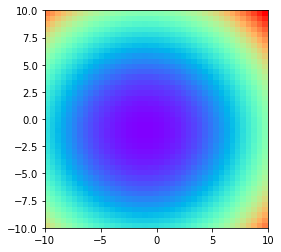

In [5]:
nbins       = 41
ranges      = ((-10, 10), (-10, 10))
a0, a, b, c = 0, (1, 1), (1, 1), (0,)
fun, grad, hess = csources.taylor(a0, a, b, c)
print('grad ', grad)
print('hess ', hess)
ndim  = len(a)
xi    = np.linspace(-1., 1, 3)
x     = cu.ut_mesh(ndim * (xi,)) 
img, bins = csources.from_function(fun, nbins, ranges)
fig(); voxels(img, bins);


tsources.test_taylor(x, a0, a, b, c)

### Test function

test from function  True


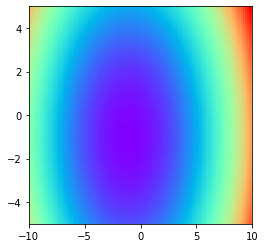

In [6]:
a0, a, b, c   = 0, (1, 1), (1, 1), (0,)
nbins, ranges = 101, ((-10, 10), (-5, 5))
ndim = len(a)
def _fun(x):
    y = a0
    k = 0
    for i in range(ndim): 
        y += a[i] * x[i] + (b[i] * x[i]**2)/2
        for j in range(i + 1, ndim): 
            y += c[k] * x[i] * x[j]
            k += 1
    return y
fun, _, _ = csources.taylor(a0, a, b, c)
img, bins = csources.from_function(_fun, nbins, ranges)
tsources.test_from_function( fun, nbins, ranges)
tsources.test_from_function(_fun, nbins, ranges)
print('test from function ', True)
fig(); voxels(img, bins);
#plt.imshow(img, origin = 'lower');
#plt.colorbar();

### Test gradient

 grad   0 2.9999999999999973
 grad   1 -5.999999999999994


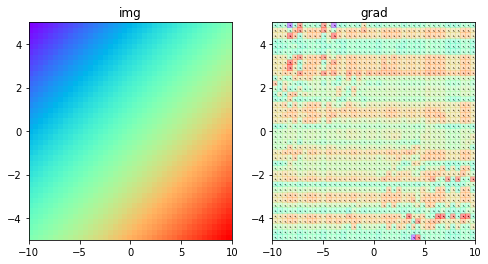

In [7]:
a0, a         = 0, (3, -6)
nbins, ranges = 41, ((-10, 10), (-5, 5))
fun           = lambda x: a0 + a[0] * x[0] + a[1] * x[1]
#fun, grad, _  = csources.get_taylor(a0, a)
img, bins     = csources.from_function(fun, nbins, ranges)
steps         = cu.ut_steps(bins)
vgrad, edir   = sclouds.gradient(img, steps)
fig(1, 2); 
plt.subplot(1, 2, 1); voxels(img, bins); plt.title('img');
plt.subplot(1, 2, 2); quiver(img, edir, bins); voxels(vgrad, bins, alpha = 0.4); plt.title('grad');
for i in range(ndim): print(' grad  ', i,  np.mean(vgrad * edir[i]))


### Test hessian

 hess [0, 0]  -0.9851485148514801
 hess [1, 1]  -2.9554455445544523
 hess [0, 1]  0.9999999999999979
hess [ 0 0 ] =  -1.0 , mean  -1.0000000000000253
hess [ 0 1 ] =  1.0 , mean  1.000000000000011
hess [ 1 0 ] =  1.0 , mean  1.000000000000011
hess [ 1 1 ] =  -3.0 , mean  -2.99999999999989
test hessian  True


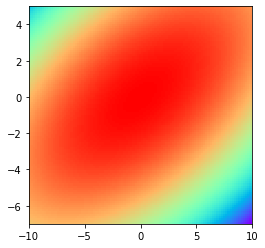

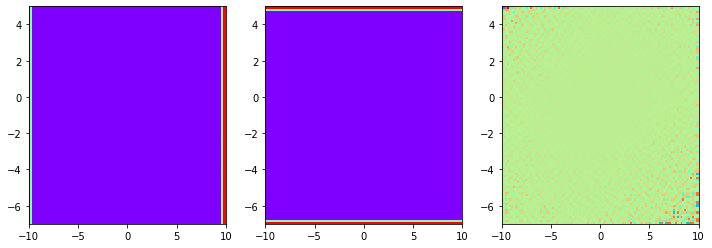

In [8]:
b, c          = (-1, -3), (1,)
nbins, ranges = 101, ((-10, 10), (-7, 5))
fun           = lambda x: b[0] * x[0]**2/2 + b[1] * x[1]**2/2 + c[0] * x[0] * x[1] 
img, bins     = csources.from_function(fun, nbins, ranges)
fig(); voxels(img, bins);
steps         = cu.ut_steps(bins)
hess          = sclouds.hessian(img, steps)
fig(1, 3); 
plt.subplot(1, 3, 1); voxels(hess[0, 0], bins); print(' hess [0, 0] ', np.mean(hess[0, 0]))
plt.subplot(1, 3, 2); voxels(hess[1, 1], bins); print(' hess [1, 1] ', np.mean(hess[1, 1]))
plt.subplot(1, 3, 3); voxels(hess[0, 1], bins); print(' hess [0, 1] ', np.mean(hess[0, 1]))
tsclouds.test_hessian(nbins, ranges, b = b,  c = c)
print('test hessian ', True)

### Test laplacian

lap  -3.940594059405932
laplacian =  -4.0 , mean  -3.9999999999999147
test laplacian  True


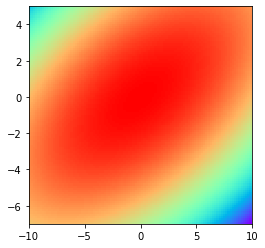

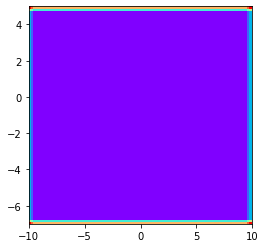

In [9]:
b, c          = (-1, -3), (1,)
nbins, ranges = 101, ((-10, 10), (-7, 5))
fun           = lambda x: b[0] * x[0]**2/2 + b[1] * x[1]**2/2 + c[0] * x[0] * x[1] 
img, bins     = csources.from_function(fun, nbins, ranges)
fig(); voxels(img, bins);
steps         = cu.ut_steps(bins)
lap           = sclouds.laplacian(img, steps)
fig(1, 1); 
plt.subplot(1, 1, 1); voxels(lap, bins); print('lap ', np.mean(lap))
tsclouds.test_laplacian(nbins, ranges, b = b,  c = c)
print('test laplacian ', True)

### Test reverse matrix

In [10]:
tsclouds.test_rev_matrix(hess)
print('test reverse matrix ', True)

test reverse matrix  True


### Test det hessian

dethess  1.9115527889422466
det hessian =  2.0 , mean  1.999999999999943
test det hessian  True


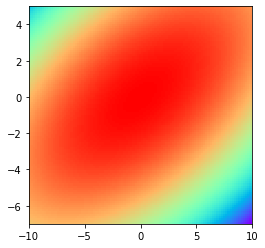

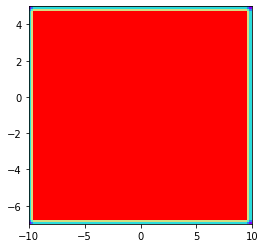

In [11]:
b, c          = (-1, -3), (1,)
nbins, ranges = 101, ((-10, 10), (-7, 5))
fun           = lambda x: b[0] * x[0]**2/2 + b[1] * x[1]**2/2 + c[0] * x[0] * x[1] 
img, bins     = csources.from_function(fun, nbins, ranges)
fig(); voxels(img, bins);
steps         = cu.ut_steps(bins)
dhess         = sclouds.det_hessian(img, steps)
fig(1, 1); 
plt.subplot(1, 1, 1); voxels(dhess, bins); print('dethess ', np.mean(dhess))
tsclouds.test_det_hessian(nbins, ranges, b,  c)
print('test det hessian ', True)

### test min curvature

hess  [[-3.  1.]
 [ 1. -4.]]
[-4.61803399 -2.38196601]
 curv0  -4.618033988749895 , min curv  -4.618033988749874
 i-coor  0  edir  -0.5257311121191335 -0.5257311121191297
 i-coor  1  edir  0.8506508083520399 0.8506508083520423
Test min curvature  True


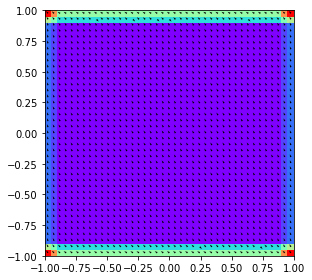

In [12]:
nbins   = 41
ranges  = ((-1, 1), (-1, 1))
b       = (-3, -4)
c       = (1,)
tol     = 5e-2
    
nborder       = 5
ndim          = len(b)  
assert len(ranges) == ndim, 'not valid number of ranges'
    
ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
print('hess ', hess)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
center = tuple([[nborder, -nborder] for i in range(ndim)])

leig, eeig   = np.linalg.eigh(hess)
print(leig)
curv0, edir0 = leig[0], eeig[..., 0]
curv , edir  = sclouds.min_curvature(img, steps)
print(' curv0 ', curv0, ', min curv ', np.mean(curv[center]))
for i in range(ndim):
    print(' i-coor ', i, ' edir ', edir0[i], np.mean(edir[i][center]))

fig(1, 2)
plt.subplot(1, 2, 1); voxels(curv, bins); quiver(curv, edir, bins);
efig();
    
tsclouds.test_min_curvature(nbins, ranges, b, c);
print('Test min curvature ', True)

### Test min transverse curvature

hess  [[-3.  0.]
 [ 0. -4.]]
[-4. -3.]
 curv0  -4.0 , min curv  -4.000000000000007
 i-coor  0  edir  0.0 1.0
 i-coor  1  edir  1.0 0.0
 mag 1.0
Test min curvature  True


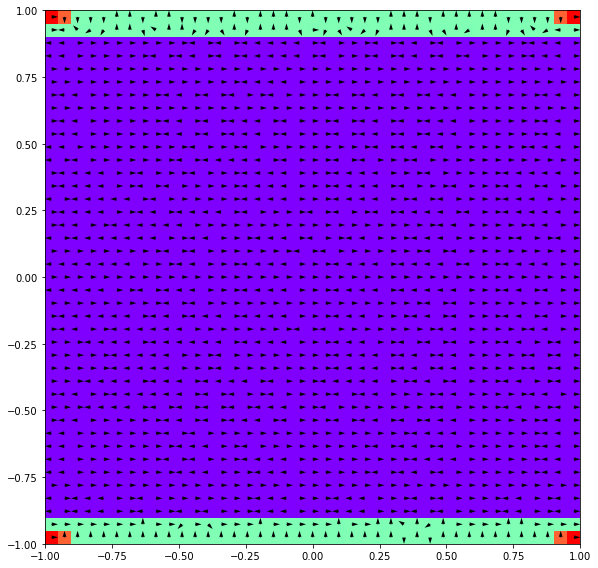

In [149]:
nbins   = 41
ranges  = ((-1, 1), (-1, 1))
b       = (-3, -4)
c       = (0,)
tol     = 5e-2
    
nborder       = 5
ndim          = len(b)  
assert len(ranges) == ndim, 'not valid number of ranges'
    
ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
print('hess ', hess)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
center = tuple([[nborder, -nborder] for i in range(ndim)])

leig, eeig   = np.linalg.eigh(hess)
print(leig)
curv0, edir0 = np.sum(leig[:-1]), eeig[..., 0]
curv , edir  = sclouds.min_transverse_curvature(img, steps)
print(' curv0 ', curv0, ', min curv ', np.mean(curv[center]))
for i in range(ndim):
    print(' i-coor ', i, ' edir ', edir0[i], np.mean(edir[i][center]))

fig(1, 2, 8)
plt.subplot(1, 2, 1); voxels(curv, bins); quiver(curv, edir, bins);
efig();
    
tsclouds.test_min_transverse_curvature(nbins, ranges, b, c);
print('Test min curvature ', True)

### Test node filter

test node filter  True


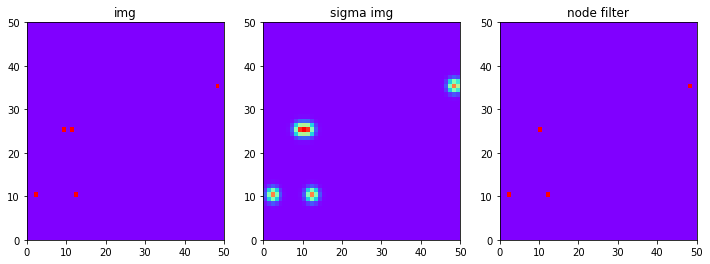

In [13]:
sigma  = 1
img, _ = csources.points()
simg   = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
xfil        = sclouds.node_filter(simg)

fig(1, 3);
plt.subplot(1, 3, 1); voxels( img); plt.title('img')
plt.subplot(1, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(1, 3, 3); voxels(xfil); plt.title('node filter')

tsclouds.test_node_filter(npoints = 2, sigma = sigma)
print('test node filter ', True)

### Test blob filter

test node filter  True


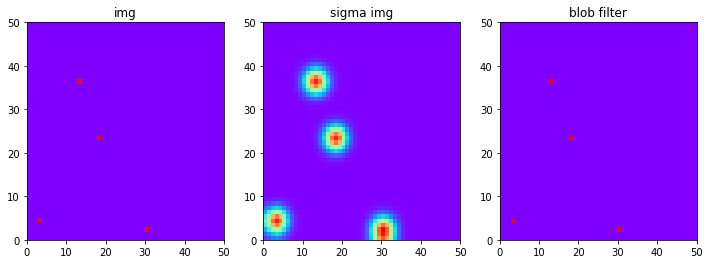

In [14]:
sigma  = 2
img, _ = csources.points(npoints = 4)
simg   = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
xfil   = sclouds.blob_filter(simg)

fig(1, 3);
plt.subplot(1, 3, 1); voxels( img); plt.title('img')
plt.subplot(1, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(1, 3, 3); voxels(xfil); plt.title('blob filter')

tsclouds.test_blob_filter(npoints = 2, sigma = sigma)
print('test node filter ', True)

### Test normal laplacian

indices  [(37, 38), (141, 21), (38, 98), (208, 50)]
radius   [3.65043748 4.33689287 7.12285137 1.40293416]


Text(0.5, 1.0, 'normal lap')

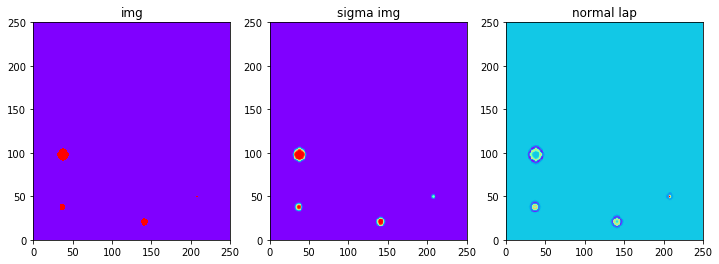

In [15]:
npoints = 4
sigma   = 1
img, indices, radius = csources.disks(npoints = npoints)
print('indices ', indices)
print('radius  ', radius)
nlap, simg = sclouds.normal_laplacian(img, sigma = sigma)
#simg   = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
#xfil   = sclouds.blob_filter(simg)

fig(1, 3);
plt.subplot(1, 3, 1); voxels( img); plt.title('img')
plt.subplot(1, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(1, 3, 3); voxels(nlap); plt.title('normal lap')

### Test normal laplacian scan

estimated radius factor  1.7004989460233144 +/- 0.24615056588299147
mean  1.6454636593345078 std 0.20959049679858266
test nlap scan  True


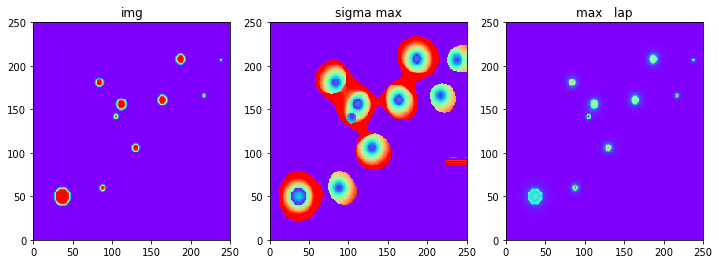

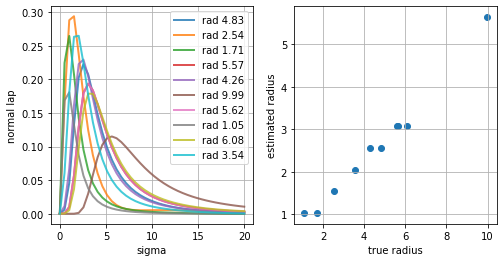

In [16]:
npoints   = 10
maxradius = 10
sigma     = 1
sigmas    = np.linspace(0, 2 * maxradius, 40)
img, indices, radius = csources.disks(npoints = npoints, maxradius = maxradius)
simg                 = ndimg.gaussian_filter(img, sigma) if sigma >0 else img
#print('indices ', indices)
#print('radius  ', radius)
sigmax, lapmax, laps = sclouds.nlap_scan(simg, sigmas = sigmas, filter = False)
#simg   = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
#xfil   = sclouds.blob_filter(simg)

fig(1, 3);
plt.subplot(1, 3, 1); voxels(simg)  ; plt.title('img')
plt.subplot(1, 3, 2); voxels(sigmax); plt.title('sigma max')
plt.subplot(1, 3, 3); voxels(lapmax); plt.title('max   lap')

fig(1, 2);
plt.subplot(1, 2, 1)
nsigmas = laps.shape[0]
for i, index in enumerate(indices):
    xlaps = [laps[(i,) + index] for i in range(nsigmas)]
    plt.plot(sigmas, xlaps, label = 'rad {:4.2f}'.format(radius[i]), alpha = 0.8, lw = 2);
plt.legend();
plt.xlabel('sigma'); plt.ylabel('normal lap'); plt.grid();

plt.subplot(1, 2, 2)
radmu = [sigmax[index] for index in indices]
rat   = np.array(radius)/np.array(radmu)
print('estimated radius factor ', np.mean(rat), '+/-', np.std(rat))
plt.scatter(radius, radmu); plt.grid();
plt.xlabel('true radius'); plt.ylabel('estimated radius');

tsclouds.test_nlap_scan(npoints, sigma, maxradius)
print('test nlap scan ', True)

 ### Test edges

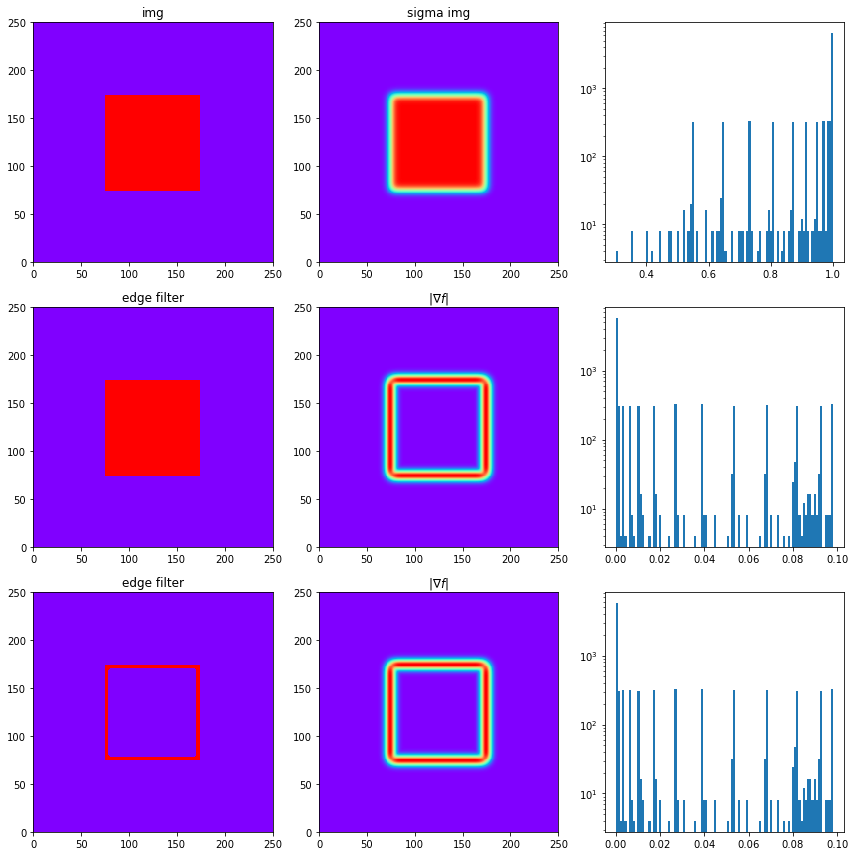

In [72]:
sigma      = 4
img, bins = csources.rectangle()
simg      = ndimg.gaussian_filter(img, sigma)
mask      = img > 0

fig(3, 3);
plt.subplot(3, 3, 1); voxels(img) ; plt.title('img')
plt.subplot(3, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(3, 3, 3); plt.hist(simg[mask].flatten(), 100); plt.yscale('log');
for i, math_condition in enumerate((False, True)):
    perc = 100 if math_condition else 100
    xfil, lvv = sclouds.edge_filter(simg, mask = mask, math_condition = math_condition, perc = perc)
    plt.subplot(3, 3, 3 * i + 4); voxels(xfil); plt.title('edge filter');
    plt.subplot(3, 3, 3 * i + 5); voxels(lvv); plt.title(r'$|\nabla f|$');
    plt.subplot(3, 3, 3 * i + 6); plt.hist(lvv[mask].flatten(), 100); plt.yscale('log');
efig();

### Ridge Filter

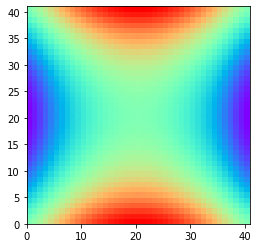

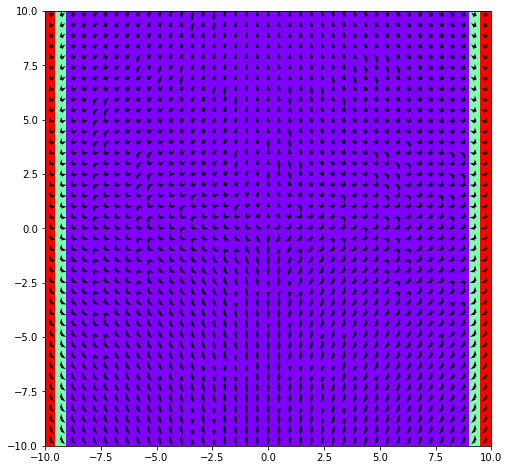

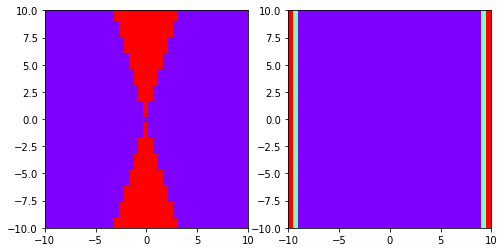

In [102]:
sigma  = 1
b, c   = (-2, 2), (0,)
fun, grad, hess = csources.taylor(b = b, c = c)
nbins           = 41
ranges          = (-10, 10), (-10, 10)
img, bins       = csources.from_function(fun, nbins, ranges)
steps           = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
fig(1, 1);  voxels(simg)

grad, edir  = sclouds.gradient(img, steps)
curv, edir0 = sclouds.min_transverse_curvature(img, steps)

fig(1, 1, 8)
voxels(curv, bins); quiver(curv, edir0, bins); quiver(curv, edir, bins);

xfil, rv = sclouds.ridge_filter(img, steps, perc = 100)

fig(1, 2)
plt.subplot(1, 2, 1); voxels(xfil, bins);
plt.subplot(1, 2, 2); voxels(rv, bins);

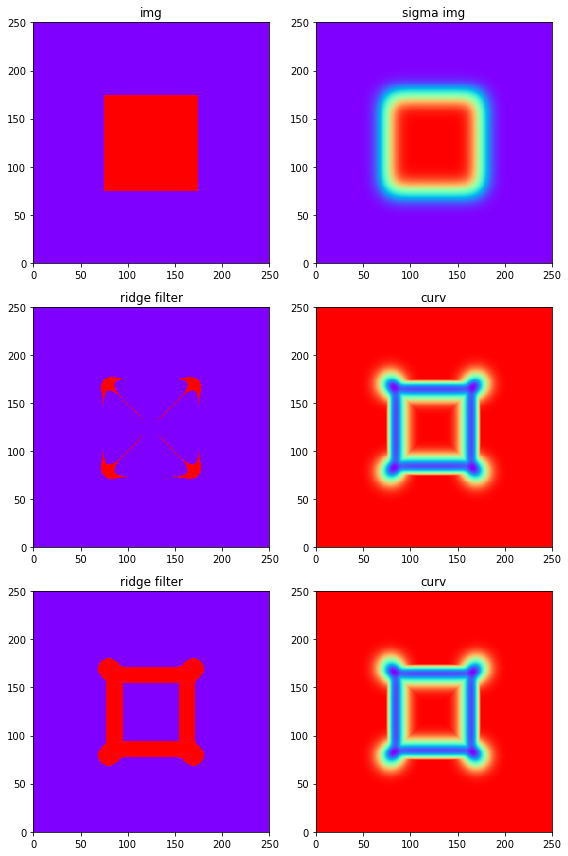

In [117]:
sigma     = 10
img, bins = csources.rectangle()
simg      = ndimg.gaussian_filter(img, sigma)
xfil, rv  = sclouds.ridge_filter(simg)

fig(3, 2);
plt.subplot(3, 2, 1); voxels(img) ; plt.title('img')
plt.subplot(3, 2, 2); voxels(simg); plt.title('sigma img')
for i, hard in enumerate((True, False)):
    perc = 100 if hard else 10
    xfil, lvv = sclouds.ridge_filter(simg, math_condition = hard, perc = perc)
    plt.subplot(3, 2, 2 * i + 3); voxels(xfil); plt.title('ridge filter');
    plt.subplot(3, 2, 2 * i + 4); voxels(lvv); plt.title(r'curv');
efig();

### Test ridge lambda filter

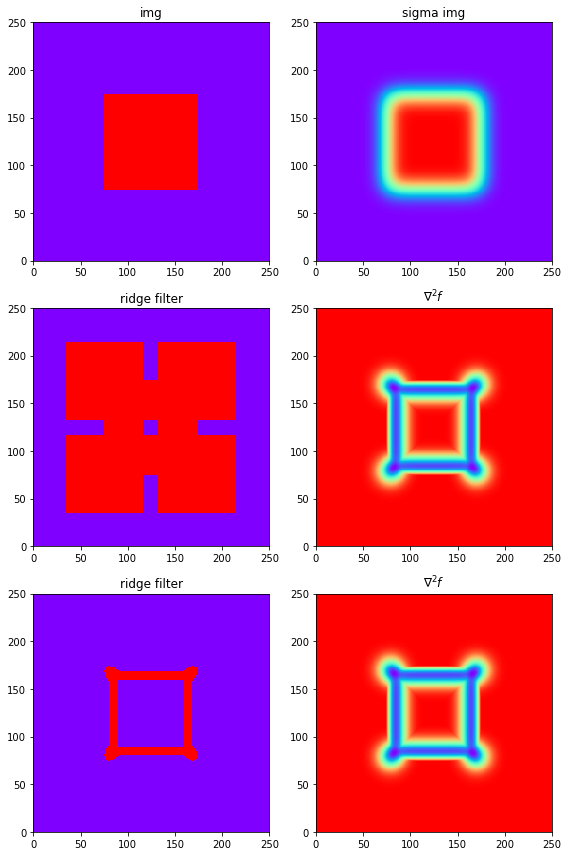

In [122]:
sigma     = 10
img, bins = csources.rectangle()
simg      = ndimg.gaussian_filter(img, sigma)
mask      = simg > 0 

fig(3, 2);
plt.subplot(3, 2, 1); voxels(img) ; plt.title('img')
plt.subplot(3, 2, 2); voxels(simg); plt.title('sigma img')
for i, hard in enumerate((True, False)):
    perc = 100 if hard else 10
    xfil, lvv = sclouds.ridge_lambda_filter(simg, mask = mask, math_condition = hard, perc = perc)
    plt.subplot(3, 2, 2 * i + 3); voxels(xfil); plt.title('ridge filter');
    plt.subplot(3, 2, 2 * i + 4); voxels(lvv); plt.title(r'$\nabla^2 f$');
efig();


### Test ridge with line

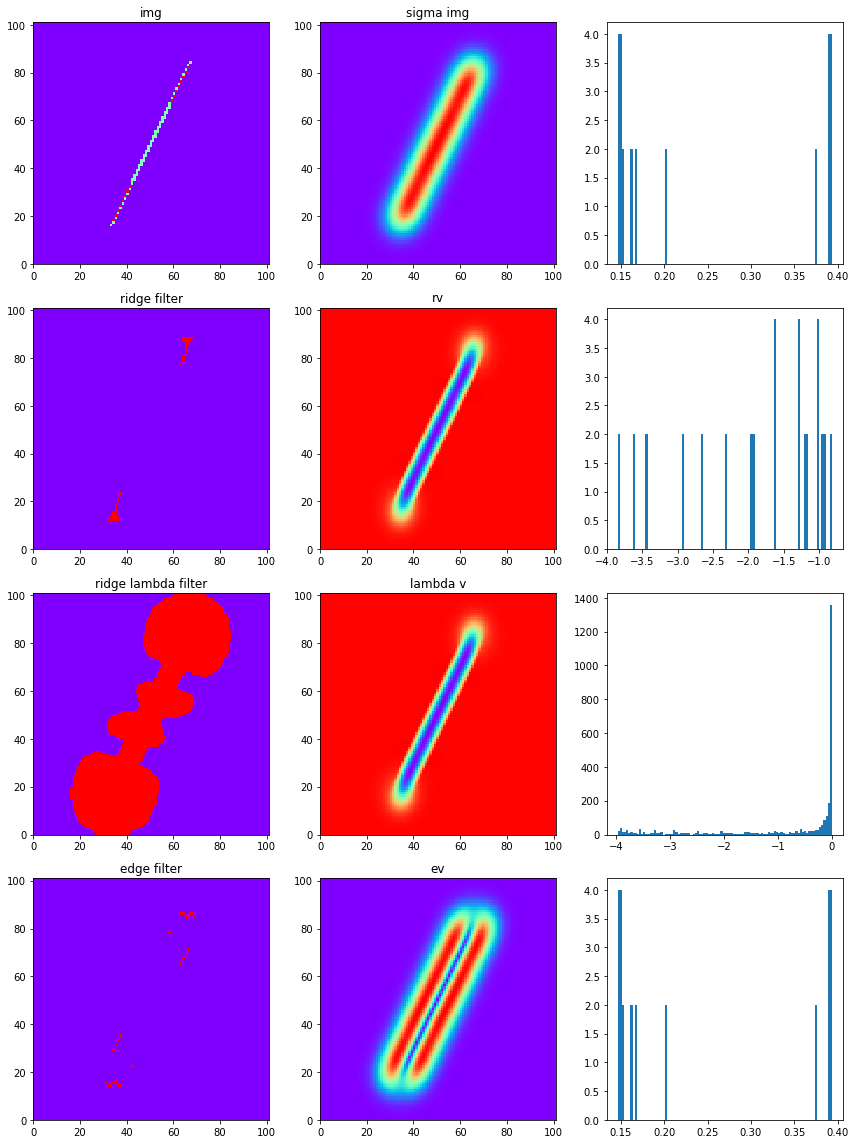

In [133]:
sigma  = 5
a0, ax = 0, 1
b0, bx = 1, 4
nbins  = 101
ts     = np.linspace(0, 1, nbins)
border = 1
xline  = lambda x : a0 + ax * x
yline  = lambda x : b0 + bx * x
xlines = (xline, yline)
eline  = lambda x : 1 + 0 *x
ranges = [(xline(0) - border, xline(1) + border) for xline in xlines] 

hard =  True
perc =    40

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
mask      = simg >= 0
efil, ev  = sclouds.edge_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)
xfil, rv  = sclouds.ridge_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)
yfil, yv  = sclouds.ridge_lambda_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)

fig(4, 3);
plt.subplot(4, 3, 1); voxels(img) ; plt.title('img')
plt.subplot(4, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(4, 3, 3); plt.hist(ev[efil].flatten(), 100);

plt.subplot(4, 3, 4); voxels(xfil); plt.title('ridge filter');
plt.subplot(4, 3, 5); voxels(rv)  ; plt.title(r'rv');
plt.subplot(4, 3, 6); plt.hist(rv[xfil].flatten(), 100);

plt.subplot(4, 3, 7); voxels(yfil); plt.title('ridge lambda filter');
plt.subplot(4, 3, 8); voxels(yv)  ; plt.title(r'lambda v');
plt.subplot(4, 3, 9); plt.hist(yv[yfil].flatten(), 100);

plt.subplot(4, 3, 10); voxels(efil); plt.title('edge filter');
plt.subplot(4, 3, 11); voxels(ev)  ; plt.title(r'ev');
plt.subplot(4, 3, 12); plt.hist(ev[efil].flatten(), 100);

efig();

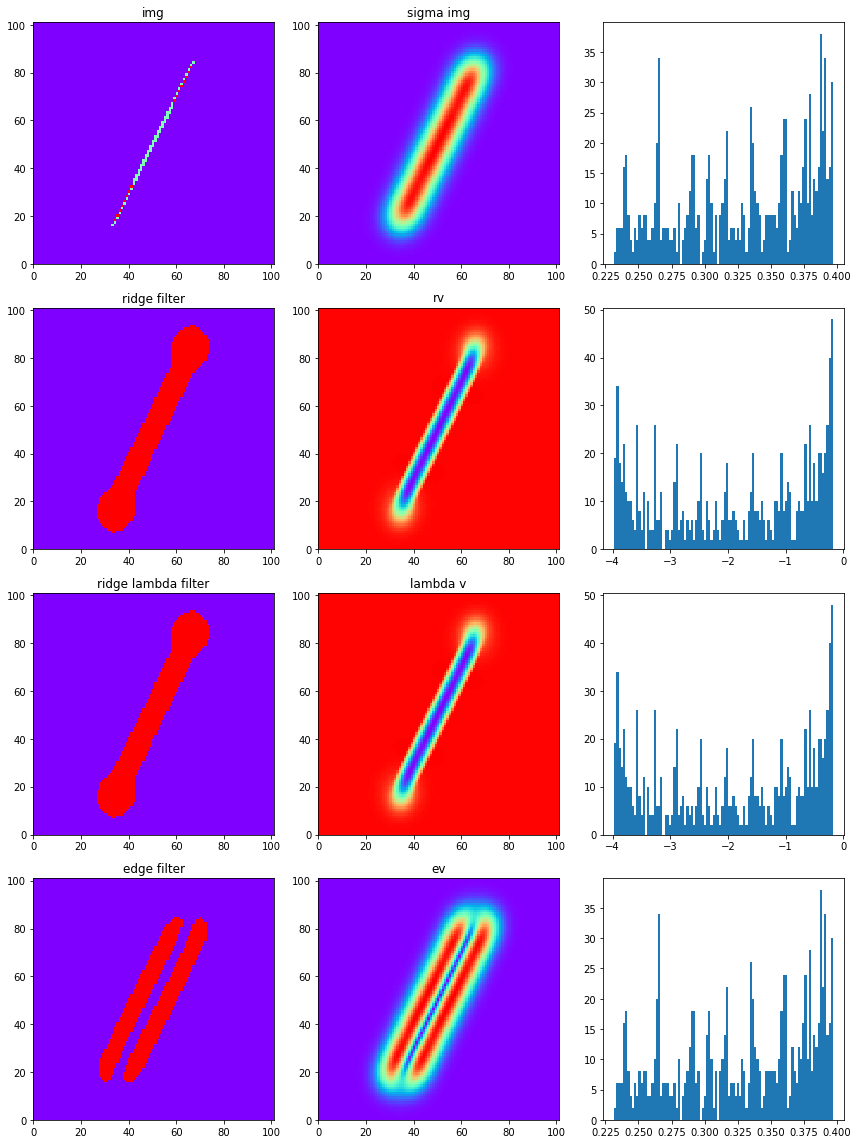

In [134]:
hard = False
perc =    10

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
efil, ev  = sclouds.edge_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)
xfil, rv  = sclouds.ridge_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)
yfil, yv  = sclouds.ridge_lambda_filter(simg, steps, mask = mask, math_condition = hard, perc = perc)

fig(4, 3);
plt.subplot(4, 3, 1); voxels(img) ; plt.title('img')
plt.subplot(4, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(4, 3, 3); plt.hist(ev[efil].flatten(), 100);

plt.subplot(4, 3, 4); voxels(xfil); plt.title('ridge filter');
plt.subplot(4, 3, 5); voxels(rv)  ; plt.title(r'rv');
plt.subplot(4, 3, 6); plt.hist(rv[xfil].flatten(), 100);

plt.subplot(4, 3, 7); voxels(yfil); plt.title('ridge lambda filter');
plt.subplot(4, 3, 8); voxels(yv)  ; plt.title(r'lambda v');
plt.subplot(4, 3, 9); plt.hist(yv[yfil].flatten(), 100);

plt.subplot(4, 3, 10); voxels(efil); plt.title('edge filter');
plt.subplot(4, 3, 11); voxels(ev)  ; plt.title(r'ev');
plt.subplot(4, 3, 12); plt.hist(ev[efil].flatten(), 100);

efig();

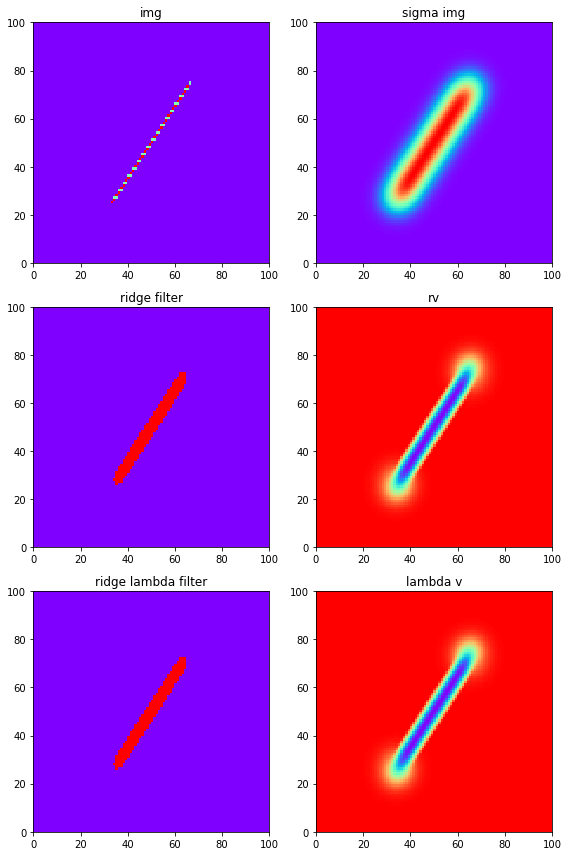

In [139]:
sigma  = 5
a0, ax = 0, 1
b0, bx = 1, 2
ts     = np.linspace(0, 1, 100)
nbins  = 100
border = 1
xline  = lambda x : a0 + ax * x
yline  = lambda x : b0 + bx * x
xlines = (xline, yline)
eline  = lambda x : 1 + 0 *x
ranges = [(xline(0) - border, xline(1) + border) for xline in xlines] 


img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
mask      = simg > 0
xfil, rv  = sclouds.ridge_filter       (simg, steps, math_condition = False, perc = 5, mask = mask)
yfil, yv  = sclouds.ridge_lambda_filter(simg, steps, math_condition = False, perc = 5, mask = mask)


fig(3, 2);
plt.subplot(3, 2, 1); voxels(img) ; plt.title('img')
plt.subplot(3, 2, 2); voxels(simg); plt.title('sigma img')
plt.subplot(3, 2, 3); voxels(xfil); plt.title('ridge filter');
plt.subplot(3, 2, 4); voxels(rv)  ; plt.title(r'rv');
plt.subplot(3, 2, 5); voxels(yfil); plt.title('ridge lambda filter');
plt.subplot(3, 2, 6); voxels(yv)  ; plt.title(r'lambda v');
efig();

**TODO:**

  * Maybe math_condtion = False, perc = 10?

### Test features

features test  True


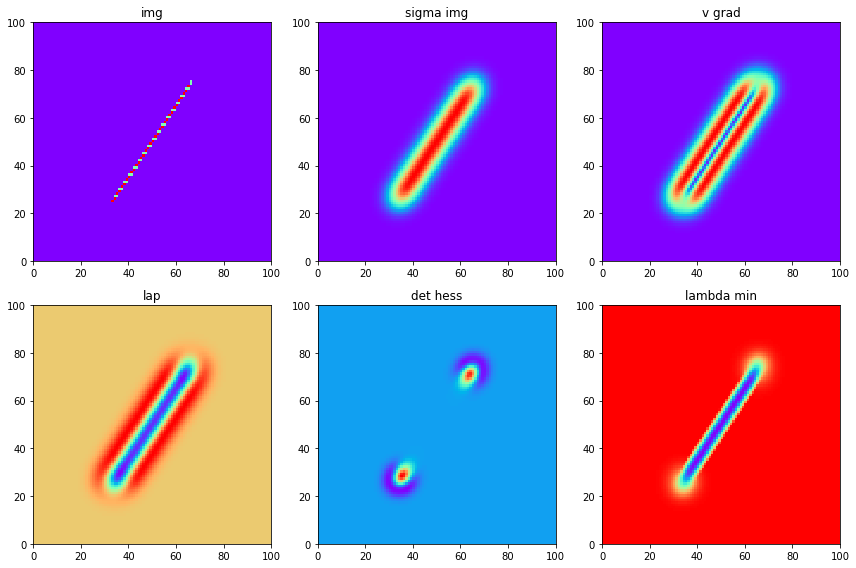

In [140]:
sigma  = 4
a0, ax = 0, 1
b0, bx = 1, 2
ts     = np.linspace(0, 1, 100)
nbins  = 100
border = 1
xline  = lambda x : a0 + ax * x
yline  = lambda x : b0 + bx * x
xlines = (xline, yline)
eline  = lambda x : 1 + 0 *x
ranges = [(xline(0) - border, xline(1) + border) for xline in xlines] 

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)

vgrad, lap, dhess, lmin = sclouds.features(simg, steps)

fig(2, 3);
plt.subplot(2, 3, 1); voxels(img)  ; plt.title('img')
plt.subplot(2, 3, 2); voxels(simg) ; plt.title('sigma img')
plt.subplot(2, 3, 3); voxels(vgrad); plt.title('v grad')
plt.subplot(2, 3, 4); voxels(lap)  ; plt.title('lap')
plt.subplot(2, 3, 5); voxels(dhess); plt.title('det hess');
plt.subplot(2, 3, 6); voxels(lmin) ; plt.title('lambda min');
efig();

tsclouds.test_features()
print('features test ', True)

## Test non-differencial clouds

### Test gradient

In [ ]:
a0, a         = 0, (1, 1)
nbins, ranges = 31, ((-10, 10), (-10, 10))
fun           = lambda x: a0 + a[0] * x[0] + a[1] * x[1]
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
agrad, adir   = tdclouds._dgrad(a, steps)
vgrad, ndir   = dclouds.gradient(img, steps)
center        = tuple([[2, -2] for i in range(ndim)])

print('discrete gradient ', agrad, 'dir ', adir)
fig(1, 2, 8); 
plt.subplot(1, 2, 1); voxels(img, bins); plt.title('img');
plt.subplot(1, 2, 2); voxels(vgrad, bins); quiver(vgrad, ndir, bins); plt.title('vgrad');
efig();

grad = vgrad * ndir
for i in range(ndim):
    print(' vgrad ', i, agrad * adir[i], np.mean(grad[i][center]));

tdclouds.test_gradient(nbins, ranges, a0, a, tol = 2e-2);
print('Test discrete gradient ', True)

### Test curvature

In [ ]:
b, c          = (1, 1), (1,)
nbins, ranges = 101, ((-1, 1), (-1, 1))

ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
print(np.sum(img <= 0))
fig(); voxels(img, bins);
steps         = cu.ut_steps(bins)
#agrad, adir   = dclouds._dgrad(a, steps)
center = tuple([[2, -2] for i in range(ndim)])
print(center)

print('steps ', steps)
print('hess  ', hess)
fig(2, 2); 
xmesh  = cu.ut_mesh(bins)
for i, move in enumerate(dclouds.moves_face(ndim)):
    curv0 = tdclouds._dcurv   (hess, move, steps)
    curv1 = dclouds.curvature(img , move, steps)
    print('move ', move, ' curv0', curv0, ' mean curv ', np.mean(curv1[center]))
    plt.subplot(2, 2, i + 1); voxels(curv1, bins); plt.title('curv ' + str(move))
efig();

tdclouds.test_curvature(nbins, ranges, b, c, tol = 2e-2);
tdclouds.test_curvature();
print('Test discrete curvature ', True)

### Test laplacian for rough images

In [ ]:
b, c          = (1, 1), (1,)
nbins, ranges = 101, ((-1, 1), (-1, 1))

ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
print(np.sum(img <= 0))
fig(); voxels(img, bins);
steps         = cu.ut_steps(bins)
#agrad, adir   = dclouds._dgrad(a, steps)
center = tuple([[2, -2] for i in range(ndim)])
print(center)

print('steps ', steps)
print('hess  ', hess)
fig(1, 2); 
for i, extended in enumerate((False, True)):
    lap0 = tdclouds._dlap   (hess, steps, extended = extended)
    lap  = dclouds.laplacian(img , steps, extended = extended)
    print('extended ', extended, ' lap0' , lap0, ' mean lap ', np.mean(lap[center]))
    plt.subplot(1, 2, i + 1); voxels(lap, bins); plt.title('lap, extended = ' + str(extended))
efig();

tdclouds.test_laplacian(nbins, ranges, b, c, tol = 2e-2);
print('Test rough laplacian ', True)

### Test rough transverse curvature

In [ ]:
nbins   = 101
ranges  = ((-1, 1), (-1, 1))
b       = (1, 1)
c       = (0,)
tol     = 5e-2
    
nborder       = 5
ndim          = len(b)  
assert len(ranges) == ndim, 'not valid number of ranges'
    
ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
print(hess)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
center = tuple([[nborder, -nborder] for i in range(ndim)])

moves = dclouds.moves_face(ndim)
for move in moves:
    curt0  = tdclouds._dcurv_trans(hess, move, steps)
    curt   = dclouds.curvature_transverse(img, move, steps)
    print('edir ', move, ' curvt0 ', curt0, ' mean curv ', np.mean(curt[center]))

tdclouds.test_curvature_transverse();
print('Test transverse curvature ', True)

### Test min curvature for rough images

In [ ]:
nbins   = 21
ranges  = ((-1, 1), (-1, 1))
b       = (1, -1)
c       = (0,)
tol     = 5e-2
    
nborder       = 1
ndim          = len(b)  
assert len(ranges) == ndim, 'not valid number of ranges'
    
ndim          = len(b)
fun, _, hess  = csources.taylor(b = b, c = c)
print(hess)
img, bins     = csources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
center = tuple([[nborder, -nborder] for i in range(ndim)])

curv0, edir0 = tdclouds._dcurv_min(hess, steps)
curv , edir  = dclouds.min_curvature(img, steps)
print(' curv0 ', curv0, ', min curv ', np.mean(curv[center]))
for i in range(ndim):
    print(' i-coor ', i, ' edir ', edir0[i], np.mean(edir[i][center]))

fig(1, 2)
plt.subplot(1, 2, 1); voxels(curv, bins); quiver(curv, edir, bins);
efig();
    
tdclouds.test_min_curvature();
print('Test min curvature ', True)

### Test node filter for rough images

In [ ]:
sigma  = 2
img, _ = csources.points(npoints = 4)
simg   = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
mask   = simg > 0
xfil   = dclouds.node_filter(simg, mask = mask)

fig(1, 3);
plt.subplot(1, 3, 1); voxels( img); plt.title('img')
plt.subplot(1, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(1, 3, 3); voxels(xfil); plt.title('blob filter')

tdclouds.test_node_filter(npoints = 2, sigma = sigma)
print('test node filter ', True)

### Test blob filter with rough images

In [ ]:
sigma     = 3
extended  = True
img, _    = csources.points(npoints = 4)
simg      = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img  
mask      = simg > 0


lap  = dclouds.laplacian(img, extended = extended)
xfil = dclouds.blob_filter(simg, extended = extended)

fig(2, 2);
plt.subplot(2, 2, 1); voxels( img); plt.title('img')
plt.subplot(2, 2, 2); voxels(simg); plt.title('sigma img')
plt.subplot(2, 2, 3); voxels(-lap); plt.title('-lap')
plt.subplot(2, 2, 4); voxels(xfil); plt.title('blob filter')

tdclouds.test_blob_filter(npoints = 1, sigma = sigma)
print('test node filter ', True)

### Test edge filter for rough images

In [ ]:
sigma     = 0
img, bins = csources.rectangle()
simg      = ndimg.gaussian_filter(img, sigma)
xfil, lvv = dclouds.edge_filter(simg)

fig(2, 2);
plt.subplot(2, 2, 1); voxels(img) ; plt.title('img')
plt.subplot(2, 2, 2); voxels(simg); plt.title('sigma img')
plt.subplot(2, 2, 3); voxels(xfil); plt.title('edge filter');
plt.subplot(2, 2, 4); voxels(lvv); plt.title(r'$|\nabla f|$');
efig();

### Test ridge with rough image

In [ ]:
sigma     = 10
img, bins = csources.rectangle()
simg      = ndimg.gaussian_filter(img, sigma)
mask      = img > 0
xfil, rv = dclouds.ridge_filter(simg, mask = mask, perc = 50)

fig(2, 2);
plt.subplot(2, 2, 1); voxels(img) ; plt.title('img')
plt.subplot(2, 2, 2); voxels(simg); plt.title('sigma img')
plt.subplot(2, 2, 3); voxels(xfil); plt.title('edge filter');
plt.subplot(2, 2, 4); voxels(rv)  ; plt.title(r'rv');
efig();

### Test ridge with line

In [ ]:
sigma  = 5
a0, ax = 0, 1
b0, bx = 1, 4
nbins  = 80
ts     = np.linspace(0, 1, nbins)
border = 1
xline  = lambda x : a0 + ax * x
yline  = lambda x : b0 + bx * x
xlines = (xline, yline)
eline  = lambda x : 1 + 0 *x
ranges = [(xline(0) - border, xline(1) + border) for xline in xlines] 

hard = True
perc =   20

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
efil, ev  = dclouds.edge_filter(simg, steps, hard = hard, perc = perc)
xfil, rv  = dclouds.ridge_filter(simg, steps, hard = hard, perc = perc)
yfil, yv  = dclouds.ridge_lambda_filter(simg, steps, hard = hard, perc = perc)

fig(4, 3);
plt.subplot(4, 3, 1); voxels(img) ; plt.title('img')
plt.subplot(4, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(4, 3, 3); plt.hist(ev[efil].flatten(), 100);

plt.subplot(4, 3, 4); voxels(xfil); plt.title('ridge filter');
plt.subplot(4, 3, 5); voxels(rv)  ; plt.title(r'rv');
plt.subplot(4, 3, 6); plt.hist(rv[xfil].flatten(), 100);

plt.subplot(4, 3, 7); voxels(yfil); plt.title('ridge lambda filter');
plt.subplot(4, 3, 8); voxels(yv)  ; plt.title(r'lambda v');
plt.subplot(4, 3, 9); plt.hist(yv[yfil].flatten(), 100);

plt.subplot(4, 3, 10); voxels(efil); plt.title('edge filter');
plt.subplot(4, 3, 11); voxels(ev)  ; plt.title(r'ev');
plt.subplot(4, 3, 12); plt.hist(ev[efil].flatten(), 100);

efig();

In [ ]:
hard = False
perc =    10

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
efil, ev  = dclouds.edge_filter(simg, steps, hard = hard, perc = perc)
xfil, rv  = dclouds.ridge_filter(simg, steps, hard = hard, perc = perc)
yfil, yv  = dclouds.ridge_lambda_filter(simg, steps, hard = hard, perc = perc)

fig(4, 3);
plt.subplot(4, 3, 1); voxels(img) ; plt.title('img')
plt.subplot(4, 3, 2); voxels(simg); plt.title('sigma img')
plt.subplot(4, 3, 3); plt.hist(ev[efil].flatten(), 100);

plt.subplot(4, 3, 4); voxels(xfil); plt.title('ridge filter');
plt.subplot(4, 3, 5); voxels(rv)  ; plt.title(r'rv');
plt.subplot(4, 3, 6); plt.hist(rv[xfil].flatten(), 100);

plt.subplot(4, 3, 7); voxels(yfil); plt.title('ridge lambda filter');
plt.subplot(4, 3, 8); voxels(yv)  ; plt.title(r'lambda v');
plt.subplot(4, 3, 9); plt.hist(yv[yfil].flatten(), 100);

plt.subplot(4, 3, 10); voxels(efil); plt.title('edge filter');
plt.subplot(4, 3, 11); voxels(ev)  ; plt.title(r'ev');
plt.subplot(4, 3, 12); plt.hist(ev[efil].flatten(), 100);

efig();

In [ ]:
sigma  = 2
a0, ax = 0, 1
b0, bx = 1, 1
nbins  = 41
ts     = np.linspace(0, 1, nbins)
border = 1
xline  = lambda x : a0 + ax * x
yline  = lambda x : b0 + bx * x
xlines = (xline, yline)
eline  = lambda x : 1 + 0 *x
ranges = [(xline(0) - border, xline(1) + border) for xline in xlines] 

img, bins = csources.line(xlines, eline, ts, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)

mask      = simg > 0

egrad, edir = dclouds.gradient     (simg, steps, mask)
mcur , mdir = dclouds.min_curvature(simg, steps, mask)

orthogonal = False
perc       = 10

xfil = mask & (mcur < 0)
if (orthogonal):
    xfil = (xfil) & (np.isclose(np.sum(edir * mdir, axis = 0), 0))

if (np.sum(xfil) > 0):
    cut0  = np.percentile(mcur[xfil], perc)    
    xfil = (xfil) & (mcur < cut0)
    
#nfil, rv   = dclouds.ridge_lambda_filter(simg, steps, mask)

In [ ]:
fig(2, 2, 8)
plt.subplot(2, 2, 1); voxels(egrad, bins); quiver(egrad, edir, bins); plt.title('grad')
plt.subplot(2, 2, 2); voxels(mcur , bins); quiver(mcur , mdir, bins); plt.title('cur')
plt.subplot(2, 2, 3); voxels(xfil, bins) ; quiver(xfil, edir, bins); quiver(xfil, mdir, bins);
plt.subplot(2, 2, 4); voxels(mcur , bins); quiver(mcur , mdir, bins); plt.title('cur')